In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import PIL
import os
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm , classification_report as cr
import tensorflow_hub as hub
import PIL
import random

In [ ]:
vgg16=keras.applications.vgg16.VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layers in vgg16.layers:  # Freeze all Trainable Layers
  layers.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
data_augmentation=keras.Sequential([
    keras.layers.RandomRotation(0.2),# RandomRotatiion
])

In [ ]:
augment=data_augmentation(vgg16.output) # First layer OF augmentation after PreTrained model layers
drop=keras.layers.Dropout(0.2)(augment)      # DropOut Layer to avoid overfittin
x=keras.layers.Flatten()(drop)               # Flatten Layer to flatten image
prediction=keras.layers.Dense(1,activation='sigmoid')(x) # Final Output Dense layer Having One Neuron and activation is sigmoid
model=keras.models.Model(inputs=vgg16.input,outputs=prediction) # Define Model with input and output layer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Compile Model | Optimizer : Adam
                                                                                                # loss : Binary Crossentropy (binary Classification)
                                                                                                # Metrics : Accuracy
model.summary() # Model Summary

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from google.colab import drive # Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_url="/content/drive/MyDrive/Datasetsfd"
data_dir=pathlib.Path(data_url)

In [ ]:
image_dict={
    'man':list(data_dir.glob("Man/*")), # Safe Images Path List
    'women':list(data_dir.glob("Woman/*")) # Violent Images Path List
}
labels_dict={
    'man':0, # Safe Images Label
    'women':1, # Violent Images Label
}

In [ ]:
x=[]
y=[]
for label_name , images in image_dict.items():
    for image in images:
        img=cv2.imread(image)
        x.append(img)
        y.append(labels_dict[label_name])

Text(0.5, 1.0, 'Distribution Between the Classes')

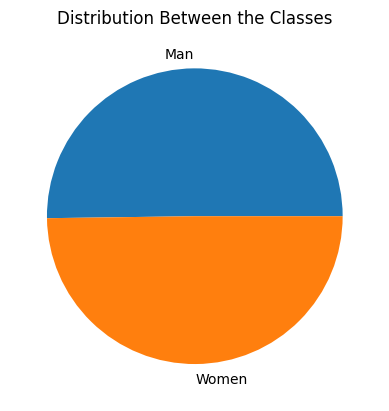

In [ ]:
man=len(image_dict['man'])
women=len(image_dict['women'])
plt.pie([man,women],labels=['Man','Women'])
plt.title("Distribution Between the Classes")

In [ ]:
y=np.array(y)
x=np.array(x)
x.shape,y.shape

((2559, 224, 224, 3), (2559,))

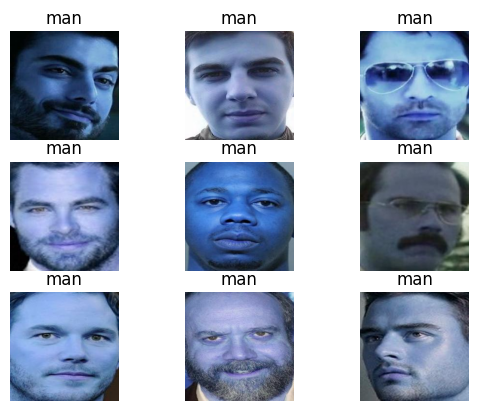

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x[random.randint(1,1000)])
  plt.axis('off')
  plt.title("man")

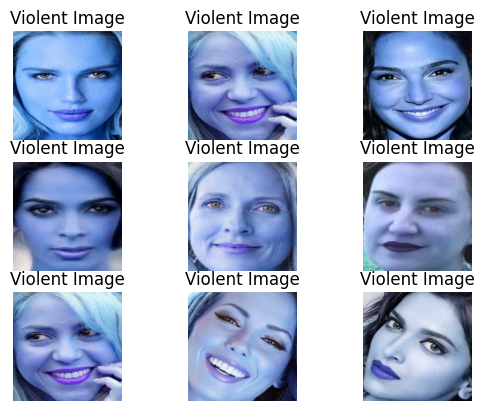

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x[random.randint(1300,2000)])
  plt.axis('off')
  plt.title("Violent Image")

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1791, 224, 224, 3), (768, 224, 224, 3), (1791,), (768,))

In [ ]:
x_train=x_train/255
x_test=x_test/255

Text(0.5, 1.0, 'Distribution Between Training and Testing Data')

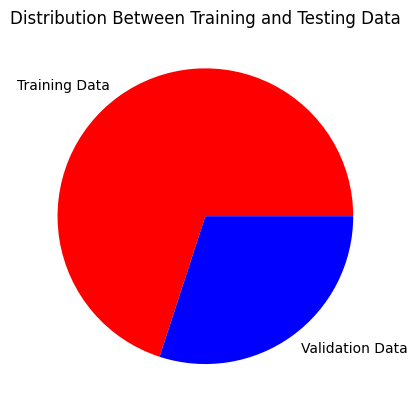

In [ ]:
plt.pie([y_train.shape[0],y_test.shape[0]],labels=['Training Data',"Validation Data"],colors=['red','blue'])
plt.axis('off')
plt.title("Distribution Between Training and Testing Data")

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.6628 - loss: 0.6500
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - accuracy: 0.9149 - loss: 0.2363
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.9346 - loss: 0.1841
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9395 - loss: 0.1640
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9522 - loss: 0.1541
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.9639 - loss: 0.1126
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9705 - loss: 0.1009
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9674 - loss: 0.1076
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.9689 - loss: 0.0889
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.9743 - loss: 0.0807


In [ ]:
model.evaluate(x_test,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.9531 - loss: 0.1262


[0.11079715937376022, 0.95703125]

In [ ]:
prediction=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step


In [ ]:
threshold=0.5
preds=[]
for i in prediction:
  if(i>threshold):
    preds.append(1)
  else:
    preds.append(0)
preds[:10],y_test[:10]

([1, 1, 0, 0, 1, 1, 1, 0, 0, 0], array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0]))

In [ ]:
print(cr(y_test,preds,target_names=['Man','Women']))

              precision    recall  f1-score   support

         Man       0.96      0.96      0.96       386
       Women       0.96      0.96      0.96       382

    accuracy                           0.96       768
   macro avg       0.96      0.96      0.96       768
weighted avg       0.96      0.96      0.96       768



<Axes: >

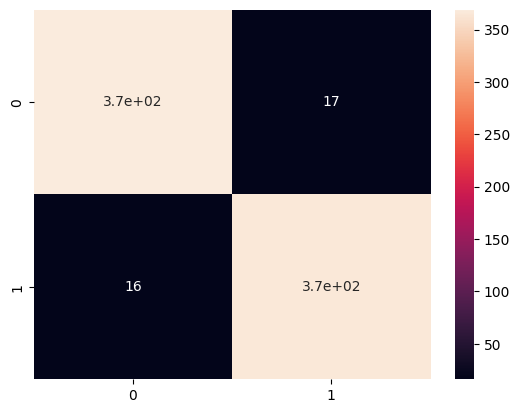

In [ ]:
cmm=(cm(y_test,preds))
sb.heatmap(cmm,annot=True)

In [ ]:
model.save("saved_model.keras")